# Advertising Sales Channel Prediction
### Problem Statement:
### Sales Channel Prediction Case Study
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read the Data 

In [2]:
Sales = pd.read_csv('Advertising.csv')
Sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


It shows that dataset has 200 rows and 5 columns. TV, Radio, Newspaper are the features and have a direct impact on Sales. Sales is the target variable which contains continuous data so it is a regression type problem. Also the column Unnamed is taken on the basis of index purpose, so it has no relation with our target variable. On this basis while general feature selection, this will be removed.

In [3]:
# Getting an Overview of Data
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Observation: Here it clearly shows that there is no null values and also the data types are all float(numeric)

## Exploratory Data Analysis
### Feature Selection on general basis

In [4]:
# Dropping the irrelevant column Unnamed:0 as it show no relation.
Sales.drop("Unnamed: 0",axis=1, inplace=True)
Sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
Sales.shape

(200, 4)

We have 200 rows and 4 columns. In the 4 columns, 3 are feature and 1 is target

In [6]:
# Getting an Overview of Data
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Observation: Here it clearly shows that there is no null values and also the data types are all float(numeric)

In [7]:
# Chacking the number of unique values in the features
Sales.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [8]:
#checking the uniqueness of the target
Sales['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

We can See the unique values in the target

In [9]:
Sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

We have rechecked by isnull function and there is no null values

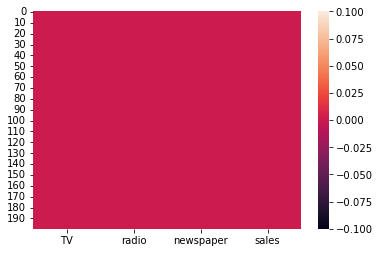

In [10]:
#Lets look into a heatmap for better visualization of the null values
sns.heatmap(Sales.isnull());

We can Clearly Visualize there is no null values

In [11]:
Sales.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

### Statistical overview of the Dataset 

In [12]:
Sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Observations:

The count of all the columns are same, hence we can see that the data is balanced

The mean of TV is higher in comparision to others hence we can assume that the sales generated from TV is higher

We also see 0 min data, which indicates that there may be outliers and skewness in the dataset

## Data Visualization
### Checking how the dataset is distributed 

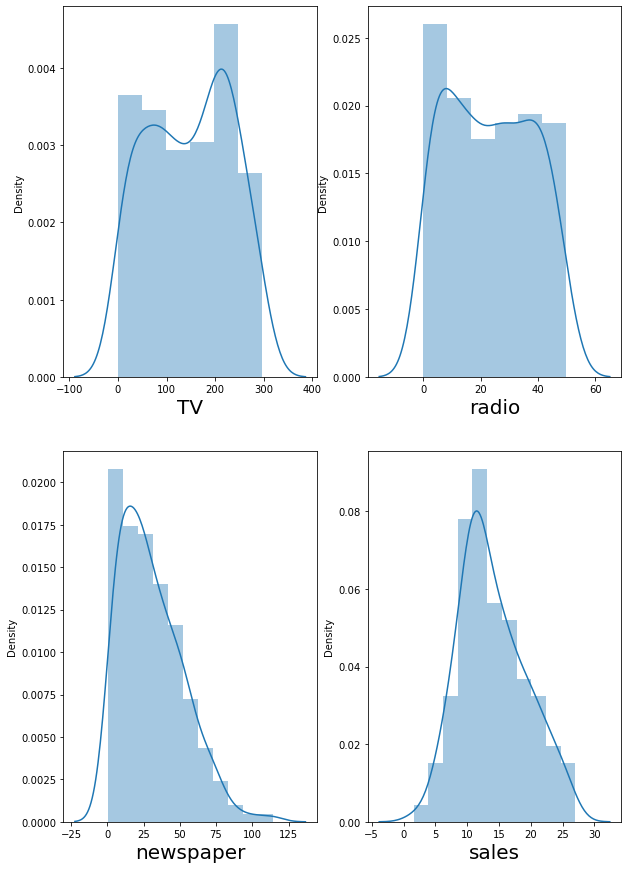

In [13]:
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1
for column in Sales:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(Sales[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1;

TV: Looks normally distributed and also see left skewness

Radio: Data looks normally distributed

Newspaper: Data look skewed left

Sales: Looks normally distributed

### Visualizing the relationship between the features and label 

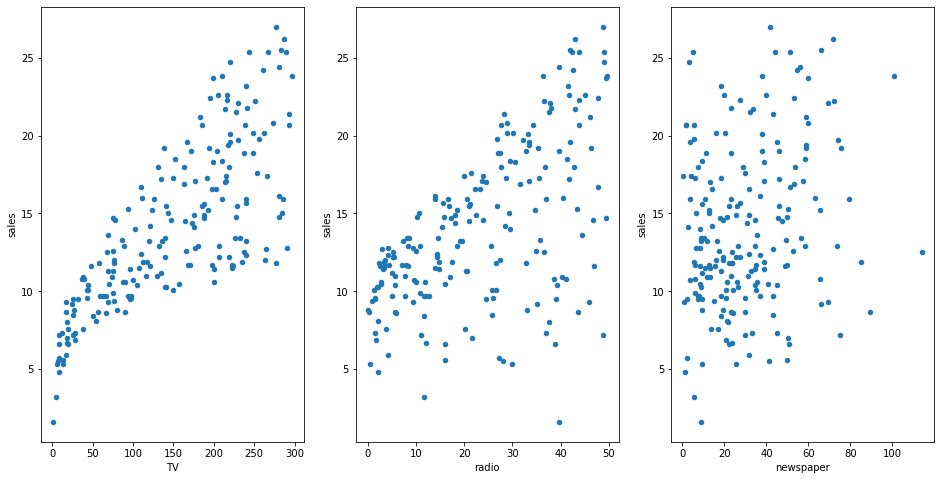

In [14]:
fig, axs = plt.subplots(1,3)
Sales.plot(x='TV',y='sales',kind='scatter',ax=axs[0],figsize=(16,8))
Sales.plot(x='radio',y='sales',kind='scatter',ax=axs[1])
Sales.plot(x='newspaper',y='sales',kind='scatter',ax=axs[2]);

TV: Show an upward trending relation

Radio: Shows an upward trending relation, though it has some outliers

Newspaper: Shows no trend and the data is scattered

### Checking the corelation between the features and label 

In [15]:
corr = Sales.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


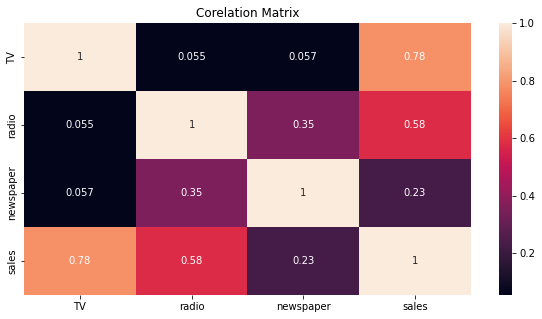

In [16]:
plt.figure(figsize=[10,5])
sns.heatmap(corr,annot=True,linecolor="white")
plt.title('Corelation Matrix');

TV shows 78% corealtion with sales

Radio shows 58% corelation with sales

Newspaper shows only 23% corelation with sales

Features has no major corelation with each other

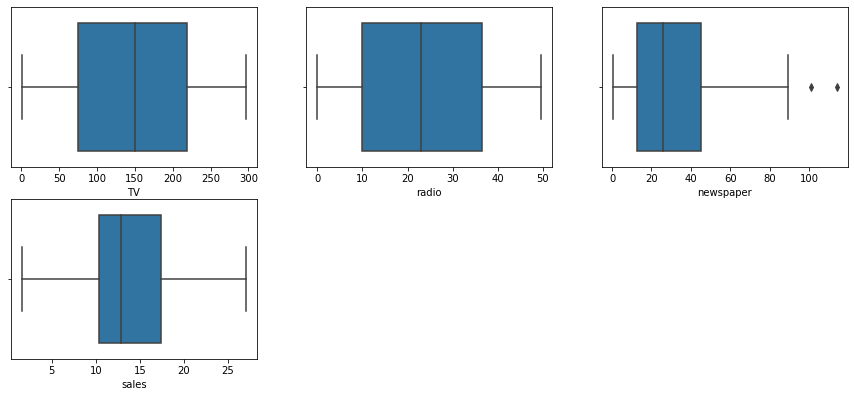

In [17]:
plt.figure(figsize=(15,10))
graph = 1

for column in Sales:
    if graph <=5:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(Sales[column])
        plt.xlabel(column,fontsize=10)
    graph+=1;

Newspaper shows Outliers

### Removing Outliers Using Zscore Method 

In [18]:
Sales.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [19]:
x=Sales[['newspaper']]
z=np.abs(zscore(x))
new_sales = Sales[(z<3).all(axis=1)]
new_sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [20]:
Sales.shape

(200, 4)

In [21]:
new_sales.shape

(198, 4)

### Checking for skewness 

In [22]:
new_sales.skew().sort_values()

TV          -0.082332
radio        0.114842
sales        0.407130
newspaper    0.650112
dtype: float64

### Removing Skewness(Power Transform) 

In [23]:
scaler = PowerTransformer(method='yeo-johnson')
new_sales[['newspaper']] = scaler.fit_transform(new_sales[['newspaper']].values)
new_sales[['newspaper']]

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622
...,...
195,-0.687435
196,-1.146090
197,-1.314437
198,1.517395


In [24]:
new_sales.skew().sort_values()

newspaper   -0.101288
TV          -0.082332
radio        0.114842
sales        0.407130
dtype: float64

The skewness has been removed

## Preprocessing The Data 
### Splitting the data into feature and label

In [25]:
X = new_sales.drop('sales',axis=1)
Y = new_sales['sales']

In [26]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622


### Scalling The Data Using StandardScaler 

In [27]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


The data has been now scalled and ready for model building

## Modelling
### Identifying the Best Random State

In [28]:
maxAccu=0
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=.30,random_state=444)
LR = LinearRegression()
LR.fit(X_train, Y_train)
pred = LR.predict(X_test)
acc=r2_score(Y_test, pred)
if acc>maxAccu:
    maxAccu=acc
        
print("Maximum r2 score is ",maxAccu)

Maximum r2 score is  0.9425912979046436


In [29]:
# Train test split based on the best Random State
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=.30,random_state=444)

### Linear Regression 

In [30]:
LR = LinearRegression() 
LR.fit(X_train, Y_train) 

# Predicting
pred=LR.predict(X_test)
print('R2 Score',r2_score(Y_test,pred))

R2 Score 0.9425912979046436


In [31]:
# Mean Absolute Error
print(metrics.mean_absolute_error(Y_test, pred))
# Mean Squared Error
print(metrics.mean_squared_error(Y_test, pred))
# Root Mean Squared Error
print(metrics.mean_squared_error(Y_test, pred))

0.9514390448864891
1.3808929733400113
1.3808929733400113


### Ridge 

In [32]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(X_train,Y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [33]:
ridgecv.alpha_

ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,Y_train)

ridge_model.score(X_test,Y_test)

0.9425906743522146

### Lasso 

In [34]:
lasscv=LassoCV(alphas=None,max_iter=1000, normalize=True)
lasscv.fit(X_train,Y_train)

LassoCV(normalize=True)

In [35]:
alpha=lasscv.alpha_
alpha

0.005668491850205613

In [36]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.005668491850205613)

In [37]:
lasso_reg.score(X_test,Y_test)

0.9424860883796283

### Random Forest Regressor 

In [38]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)

# Prediction
pred_RFR=RFR.predict(X_test)
print('R2_Score:',metrics.r2_score(Y_test,pred_RFR))

R2_Score: 0.9740226532276133


In [39]:
# Mean Absolute Error
print(metrics.mean_absolute_error(Y_test, pred_RFR))
# Mean Squared Error
print(metrics.mean_squared_error(Y_test, pred_RFR))
# Root Mean Squared Error
print(metrics.mean_squared_error(Y_test, pred_RFR))

0.5957499999999997
0.6248518833333317
0.6248518833333317


### Decision Tree Regressor 

In [40]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

# Prediction
pred_DTR=DTR.predict(X_test)
print('R2_Score:',metrics.r2_score(Y_test,pred_DTR))

R2_Score: 0.9460166710164978


In [41]:
# Mean Absolute Error
print(metrics.mean_absolute_error(Y_test, pred_DTR))
# Mean Squared Error
print(metrics.mean_squared_error(Y_test, pred_DTR))
# Root Mean Squared Error
print(metrics.mean_squared_error(Y_test, pred_DTR))

0.875
1.2984999999999998
1.2984999999999998


### Support Vector Regressor 

In [42]:
svr=SVR()
svr.fit(X_train,Y_train)

# Prediction
pred_svr=svr.predict(X_test)
print('R2_Score:',metrics.r2_score(Y_test,pred_svr))

R2_Score: 0.9203337532446152


In [43]:
# Mean Absolute Error
print(metrics.mean_absolute_error(Y_test, pred_svr))
# Mean Squared Error
print(metrics.mean_squared_error(Y_test, pred_svr))
# Root Mean Squared Error
print(metrics.mean_squared_error(Y_test, pred_svr))

0.8525564428926046
1.9162697699410385
1.9162697699410385


### Cross Validation 

In [44]:
#Linear Regression
print('Linear_Regression:',cross_val_score(LR,X_scaled,Y,cv=5).mean())

#RidgeRegression
print('Ridge_Regression:',cross_val_score(ridge_model,X_scaled,Y,cv=5).mean())
      
#Lasso Regression
print('Lasso_Regression:',cross_val_score(lasso_reg,X_scaled,Y,cv=5).mean())

#Random Forest
print('RandomForest:',cross_val_score(RFR,X_scaled, Y, cv=5).mean())

#Descission Tree
print('Decission_Tree:',cross_val_score(DTR,X_scaled,Y,cv=5).mean())

#Support Vector Regressor
print('Support_Vector:',cross_val_score(svr,X_scaled,Y,cv=5).mean())

Linear_Regression: 0.8857739370001966
Ridge_Regression: 0.8857740596315768
Lasso_Regression: 0.8859088169559881
RandomForest: 0.9759918611628031
Decission_Tree: 0.9515649931677448
Support_Vector: 0.9036275725678571


Observation:

After the cross validation of all the 6 models created, we see that 'RandomForest' is the best fit model.

Will do HyperParameterTuning of the best fit model

### HyperParameterTuning 

In [45]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [46]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [47]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [48]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [49]:
Adv_sales = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=200)
Adv_sales.fit(X_train, Y_train)
pred = Adv_sales.predict(X_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(Y_test, pred_RFR)))
print('R2_Score:',r2_score(Y_test,pred)*100)

RMSE value: 0.7904757322861542
R2_Score: 97.50295286216961


After Working on The HyperParemeter Tuning of the RandomForestRegressor Model, getting a score of 97.57%, which is a good score

### Saving the best model 

In [50]:
import joblib
joblib.dump(Adv_sales,"Adv_Sales_Channel.pkl")

['Adv_Sales_Channel.pkl']